In [1]:
import minna_functions as mf

In [13]:
import pandas as pd

In [2]:
import sqlite3
conn = sqlite3.connect('spotify.db')
c = conn.cursor()

Connect to Database:

In [4]:
get_playlist = mf.get_spotify_playlist('BQC3VHoRN5SpumhRPugWcnIGlWaP7kMxK0xAy2kVsnASwTWIVQ2WhY_-_8EImVwmFAJ2sC7VRUlEEW9lX0icHPFf5wkeBOqXMZk-xC3Zr1zbSn6WeiGUsK87g40iJg-xF0KRHzIey2D89mdVLak')

Retrieve data for every playlist we want to look at and put it into SQL table:

In [5]:
#pop hits data
get_playlist.get_playlist_SQL('37i9dQZF1DX92MLsP3K1fI', 'pop_hits') 
get_playlist.get_playlist_SQL('5TDtuKDbOhrfW7C58XnriZ', 'pop_hits')
get_playlist.get_playlist_SQL('37i9dQZF1DXcBWIGoYBM5M', 'pop_hits')
get_playlist.get_playlist_SQL('37i9dQZF1DWUa8ZRTfalHk', 'pop_hits')

In [6]:
#rap data
get_playlist.get_playlist_SQL('37i9dQZF1DX0XUsuxWHRQd', 'rap_hits') #rap caviar
get_playlist.get_playlist_SQL('5KR0bQIR4BqsgBzV2N54wm', 'rap_hits') #top hip hop
get_playlist.get_playlist_SQL('2G2zkK3cBVXB1jSsDMQSk3', 'rap_hits') # top rap hits 2019
get_playlist.get_playlist_SQL('37i9dQZF1DX2RxBh64BHjQ', 'rap_hits') #most necessary
get_playlist.get_playlist_SQL('37i9dQZF1DWUFmyho2wkQU', 'rap_hits') #hip hop drive

In [7]:
#country data
get_playlist.get_playlist_SQL('37i9dQZF1DX1lVhptIYRda', 'country_hits') #hot country
get_playlist.get_playlist_SQL('37i9dQZF1DX8S0uQvJ4gaa', 'country_hits') #new boots
get_playlist.get_playlist_SQL('37i9dQZF1DX5mB2C8gBeUM', 'country_hits') #wild country
get_playlist.get_playlist_SQL('37i9dQZF1DWYnwbYQ5HnZU', 'country_hits') #country gold

In [8]:
#jazz data 
get_playlist.get_playlist_SQL('37i9dQZF1DXbITWG1ZJKYt', 'jazz_hits') #jazz classics
get_playlist.get_playlist_SQL('37i9dQZF1DX0SM0LYsmbMT', 'jazz_hits') #jazz vibes
get_playlist.get_playlist_SQL('0pYnghexkCjipMVbXSiyOb', 'jazz_hits') #Top Jazz hits

Convert SQL database to a pandas dataframe:

In [9]:
df_pop = get_playlist.SQL_to_dataframe('pop_hits')
df_rap = get_playlist.SQL_to_dataframe('rap_hits')
df_country = get_playlist.SQL_to_dataframe('country_hits')
df_jazz = get_playlist.SQL_to_dataframe('jazz_hits')

Retrive audio feature information from each song in the playlist: 

In [10]:
df_pop = get_playlist.song_audio_features(df_pop, 'pop_hits')
df_rap = get_playlist.song_audio_features(df_rap, 'rap_hits')
df_country = get_playlist.song_audio_features(df_country, 'country_hits')
df_jazz = get_playlist.song_audio_features(df_jazz, 'jazz_hits')

None
None
None
None


Make a new column for our genres:

In [11]:
df_pop['genre'] = 'pop'
df_rap['genre'] = 'rap'
df_country['genre'] = 'country'
df_jazz['genre'] = 'jazz'

combine all data frames:

In [14]:
frames = [df_pop, df_rap, df_country, df_jazz]
total_df = pd.concat(frames)
total_df.describe()

,popularity,speechiness,danceability,energy,liveness,valence
count,973.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,57.578623,0.101065,0.655588,0.595772,0.162916,0.467617
std,20.879215,0.102862,0.149755,0.215789,0.116897,0.222776
min,0.000000,0.025100,0.163000,0.017200,0.021500,0.048100
25%,49.000000,0.038100,0.554000,0.453750,0.095100,0.292000
50%,58.000000,0.053350,0.661500,0.637500,0.117000,0.463000
75%,73.000000,0.126250,0.755000,0.758500,0.178500,0.637500
max,100.000000,0.501000,0.936000,0.966000,0.795000,0.963000


Analyze the data:

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
%matplotlib inline

Text(0.5, 1.0, 'top pop songs liveness vs. popularity')

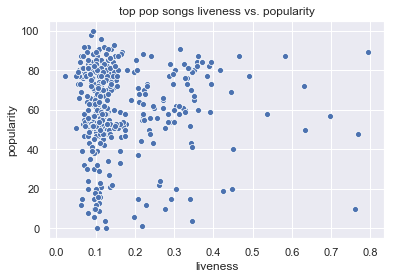

In [17]:
ax = sns.scatterplot(x=total_df["liveness"], y=total_df["popularity"], data = total_df)
plt.title('top pop songs liveness vs. popularity')

Run statistical tests on our data:

In [25]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm

In [28]:
model = ols('popularity~ liveness * C(genre)', total_df).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
model.summary()

Overall model F( 7, 400) =  21.816, p =  0.0000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     21.82
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.90e-25
Time:                        11:03:40   Log-Likelihood:                -1759.5
No. Observations:                 408   AIC:                             3535.
Df Residuals:                     400   BIC:                             3567.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    54.6030      3.226     16.927      0.000      48.261      60.945
C(genre)[T.jazz]             -6.8887      4.351     -1.583      0.114     -15.442       1.665
C(genre)[T.pop]              26.4427      4.545      5.818      0.000      17.508      35.378
C(genre)[T.rap]              12.5684      4.482      2.804      0.005       3.758      21.379
liveness                     17.4088     17.044      1.021      0.308     -16.098      50.916
liveness:C(genre)[T.jazz]   -27.1673     22.475     -1.209      0.227     -71.352      17.017
liveness:C(genre)[T.pop]    -43.9207     22.622     -1.941      0.053     -88.394       0.552
liveness:C(genre)[T.rap]    -36.0690     23.233     -1.553      0.121     -81.743       9.605
==============================================================================
Omnibus:                      126.410   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.508
Skew:                          -1.638   Prob(JB):                     4.06e-60
Kurtosis:                       5.313   Cond. No.                         45.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
anova_table = sm.stats.anova_lm(model, type= 2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(genre),3.0,48765.360294,16255.120098,48.883049,6.183707e-27
liveness,1.0,649.314070,649.314070,1.952643,1.630769e-01
liveness:C(genre),3.0,1365.979003,455.326334,1.369276,2.517021e-01
Residual,400.0,133012.324574,332.530811,NaN,NaN
